Qubits: 1, Runtime: 0.000221 seconds, Memory Usage: 114.34 MB
Qubits: 2, Runtime: 0.000159 seconds, Memory Usage: 114.34 MB
Qubits: 3, Runtime: 0.000194 seconds, Memory Usage: 114.34 MB
Qubits: 4, Runtime: 0.000211 seconds, Memory Usage: 114.34 MB
Qubits: 5, Runtime: 0.000258 seconds, Memory Usage: 114.34 MB
Qubits: 6, Runtime: 0.000863 seconds, Memory Usage: 114.34 MB
Qubits: 7, Runtime: 0.001201 seconds, Memory Usage: 114.34 MB
Qubits: 8, Runtime: 0.002054 seconds, Memory Usage: 114.34 MB
Qubits: 9, Runtime: 0.005801 seconds, Memory Usage: 114.34 MB
Qubits: 10, Runtime: 0.023813 seconds, Memory Usage: 116.66 MB
Qubits: 11, Runtime: 0.135868 seconds, Memory Usage: 116.80 MB
Qubits: 12, Runtime: 0.321452 seconds, Memory Usage: 116.80 MB
Qubits: 13, Runtime: 1.131484 seconds, Memory Usage: 116.80 MB
Qubits: 14, Runtime: 3.362425 seconds, Memory Usage: 116.80 MB
Qubits: 15, Runtime: 14.547981 seconds, Memory Usage: 116.80 MB


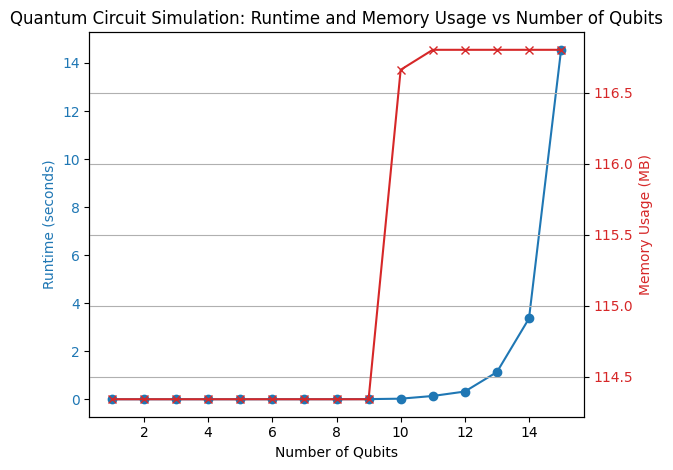

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import psutil  # For measuring memory usage

# Define basic quantum gates as matrices
X = np.array([[0, 1],
              [1, 0]])  # X gate (Pauli-X)

H = np.array([[1, 1],
              [1, -1]]) / np.sqrt(2)  # H gate (Hadamard)

I = np.array([[1, 0],
              [0, 1]])  # Identity gate

CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])  # CNOT gate

# Function to initialize n-qubit state |0...0>
def initialize_state(n):
    state = np.zeros(2**n)
    state[0] = 1  # The |0...0> state
    return state

# Function to apply a single-qubit gate to a specific qubit in an n-qubit system
def apply_single_qubit_gate(gate, state, qubit, n):
    full_gate = 1
    for i in range(n):
        if i == qubit:
            full_gate = np.kron(full_gate, gate)
        else:
            full_gate = np.kron(full_gate, I)
    return np.dot(full_gate, state)

# Function to apply a two-qubit gate (e.g., CNOT) to specific qubits in an n-qubit system
def apply_two_qubit_gate(state, control, target, n):
    if n == 2 and control == 0 and target == 1:
        return np.dot(CNOT, state)
    else:
        raise NotImplementedError("Only a 2-qubit CNOT is implemented in this demo.")

# Quantum circuit simulation for varying number of qubits
def quantum_circuit(n):
    state = initialize_state(n)

    # Apply an H gate to the first qubit (qubit 0)
    state = apply_single_qubit_gate(H, state, 0, n)

    # Apply a CNOT gate (control=0, target=1) if n >= 2 (this demo is for 2 qubits)
    if n == 2:
        state = apply_two_qubit_gate(state, 0, 1, n)

    return state

# Measure runtime and memory usage as a function of number of qubits
def measure_runtime_memory(max_qubits):
    qubit_counts = list(range(1, max_qubits + 1))
    runtimes = []
    memory_usages = []

    process = psutil.Process()  # Get the current process for memory usage tracking

    for n in qubit_counts:
        # Measure runtime
        start_time = time.time()
        quantum_circuit(n)
        end_time = time.time()
        runtimes.append(end_time - start_time)

        # Measure memory usage in MB
        memory_info = process.memory_info().rss / (1024 ** 2)  # Memory in MB
        memory_usages.append(memory_info)
        print(f"Qubits: {n}, Runtime: {end_time - start_time:.6f} seconds, Memory Usage: {memory_info:.2f} MB")

    return qubit_counts, runtimes, memory_usages

# Plotting the runtime and memory usage
def plot_runtime_memory(max_qubits):
    qubit_counts, runtimes, memory_usages = measure_runtime_memory(max_qubits)

    fig, ax1 = plt.subplots()

    # Plot runtime
    ax1.set_xlabel('Number of Qubits')
    ax1.set_ylabel('Runtime (seconds)', color='tab:blue')
    ax1.plot(qubit_counts, runtimes, marker='o', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis to plot memory usage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Memory Usage (MB)', color='tab:red')
    ax2.plot(qubit_counts, memory_usages, marker='x', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Quantum Circuit Simulation: Runtime and Memory Usage vs Number of Qubits')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Run and plot for up to n qubits
plot_runtime_memory(15)
